In [1]:
import numpy as np

"""def opt_problem(t):
    return t
    

from scipy.optimize import differential_evolution
import numpy as np
def ackley(x):
    return 1+np.log((1+0.5*x)*(1-0.0075*x*x)*(1+0.005*x*x))
bounds = [(0, 1000)]
result = differential_evolution(ackley, bounds)
result.x, result.fun
"""

'def opt_problem(t):\n    return t\n    \n\nfrom scipy.optimize import differential_evolution\nimport numpy as np\ndef ackley(x):\n    return 1+np.log((1+0.5*x)*(1-0.0075*x*x)*(1+0.005*x*x))\nbounds = [(0, 1000)]\nresult = differential_evolution(ackley, bounds)\nresult.x, result.fun\n'

In [294]:
import matplotlib.pyplot as plt

In [306]:
def alpha(a_hat, I_p_hat, I_d_hat, I_t_hat):
    return 1+5*a_hat*I_p_hat/gamma(a_hat, I_p_hat, I_d_hat, I_t_hat) if 0<a_hat<=1 else 0 if a_hat>1 else None

def gamma(a_hat, I_p_hat, I_d_hat, I_t_hat):
    return 1+5*I_d_hat*betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*a_hat**(-2) if 0<a_hat<=1 else 0 if a_hat>1 else None
    
def betta(a_hat, I_p_hat, I_d_hat, I_t_hat):
    return 1+(20*a_hat*I_d_hat) if 0<a_hat<=1 else 0 if a_hat>1 else None
def I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_p_hat*(1+1*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat))*t**(3/2)) if I_p_hat*(1+0.5*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat))*t)<1 else 1 
    
def I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return 1e-2*I_d_hat*(1+(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat))*t*t) if 1e-2*I_d_hat*(1+(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat))*t)<1 else 1 

def I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return 0.25*I_t_hat*(1+(1-betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t))**3 if betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t<1 else 0

def I(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat)

In [307]:
#staroe
"""def I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_p_hat*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t) if I_p_hat*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat)*t)<1 else 1 
    
def I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_d_hat*(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat)*t) if I_d_hat*(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat)*t)<1 else 1 

def I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_t_hat*(1-betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t) if betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t<1 else 0

def I(t, a_hat, I_p_hat, I_d_hat, I_t_hat):
    return I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat)"""

'def I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat):\n    return I_p_hat*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t) if I_p_hat*(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat)*t)<1 else 1 \n    \ndef I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat):\n    return I_d_hat*(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat)*t) if I_d_hat*(1+gamma(a_hat, I_p_hat, I_d_hat, I_t_hat)*t)<1 else 1 \n\ndef I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat):\n    return I_t_hat*(1-betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t) if betta(a_hat, I_p_hat, I_d_hat, I_t_hat)*t*t<1 else 0\n\ndef I(t, a_hat, I_p_hat, I_d_hat, I_t_hat):\n    return I_p(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_d(t, a_hat, I_p_hat, I_d_hat, I_t_hat)*I_t(t, a_hat, I_p_hat, I_d_hat, I_t_hat)'

In [308]:
lspace = np.linspace(0,1000,100000)

In [309]:
param_dict = {"a_hat":0.2,"I_p_hat":0.8,"I_d_hat":0.8,"I_t_hat":1}

In [310]:
parasha(0.04,**param_dict)

array(0.96915815)

In [311]:
def inequlity(f,t,bound1,bound2, params):
    return (f(t,**params)<=bound2)*(f(t,**params)>=bound1)

In [312]:
def parasha(t,a_hat,I_p_hat,I_d_hat,I_t_hat):
    return 1-np.log2(1+alpha(a_hat, I_p_hat, I_d_hat, I_t_hat)*I(t, a_hat, I_p_hat, I_d_hat, I_t_hat))
parasha = np.vectorize(parasha)

In [313]:
a = inequlity(parasha,lspace,0.1,0.6, param_dict)

In [314]:
lspace[np.argwhere(a==True)]

array([[0.2900029],
       [0.3500035],
       [0.3600036],
       [0.3700037],
       [0.3800038],
       [0.3900039],
       [0.400004 ],
       [0.4100041],
       [0.4200042],
       [0.4300043],
       [0.4400044],
       [0.4500045],
       [0.4600046]])

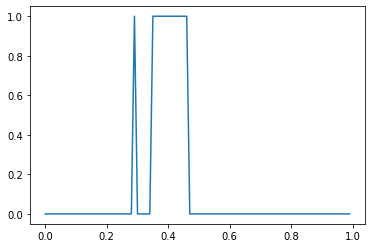

In [315]:
plt.plot(lspace[:100],a[:100]);

In [317]:
parasha(lspace,**param_dict)

array([0.98161604, 0.98081927, 0.97846906, ..., 1.        , 1.        ,
       1.        ])